#Introductin to CNN

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-05-04 02:24:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.128, 173.194.79.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  32.9MB/s    in 3.2s    

2023-05-04 02:24:06 (32.9 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# unzip the download file
zip_ref=zipfile.ZipFile("pizza_steak.zip","r")
zip_ref.extractall()
zip_ref.close()

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you're working with


In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os
# Walk through pizza_steak directory and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
# The extra file in your pizza_steak directory
!ls -ls pizza_steak

total 8
4 drwxr-xr-x 4 root root 4096 May  4 02:24 test
4 drwxr-xr-x 4 root root 4096 May  4 02:24 train


In [ ]:
# Another wat to find out how many images are in a file
num_stack_images_train=len(os.listdir('pizza_steak/train/steak'))
num_stack_images_train

750

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder=target_dir+target_class

  # Get a random image path
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")#show the shape of the image
  return img

['2687575.jpg']
Image shape: (384, 512, 3)


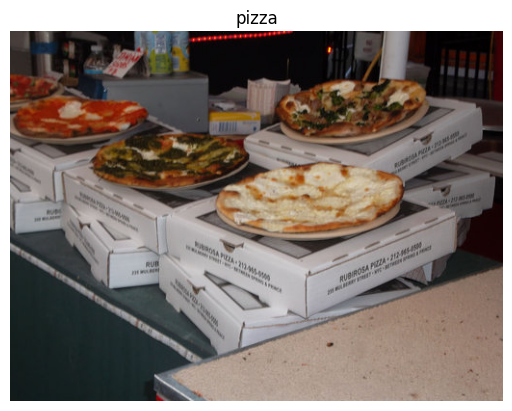

In [ ]:
# View the random image from the training dataset
img=view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

In [ ]:
img.dtype

dtype('uint8')

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 67,  59,  56],
        [ 67,  59,  56],
        [ 68,  58,  56],
        ...,
        [ 53,   4,   7],
        [ 56,   4,   8],
        [ 59,   2,   8]],

       [[ 68,  60,  57],
        [ 68,  60,  57],
        [ 69,  59,  57],
        ...,
        [ 54,   4,   7],
        [ 55,   3,   7],
        [ 58,   1,   7]],

       [[ 69,  61,  58],
        [ 69,  61,  58],
        [ 70,  60,  58],
        ...,
        [ 54,   4,   7],
        [ 55,   3,   7],
        [ 57,   2,   7]],

       ...,

       [[ 18,  27,  26],
        [ 18,  27,  26],
        [ 18,  27,  26],
        ...,
        [163, 140, 126],
        [168, 145, 131],
        [168, 147, 130]],

       [[ 18,  27,  26],
        [ 18,  27,  26],
        [ 18,  27,  26],
        ...,
        [160, 131, 115],
        [165, 136, 118],
        [164, 137, 116]],

       [[ 18,  27,  26],
        [ 18,  27,  26],
        [ 18,  27,  26],
        ...,
        [155, 122, 10

In [ ]:
# View the image shape
img.shape

(384, 512, 3)

In [ ]:
# Get all pizel value between 0 and 1
img/255.

array([[[0.2627451 , 0.23137255, 0.21960784],
        [0.2627451 , 0.23137255, 0.21960784],
        [0.26666667, 0.22745098, 0.21960784],
        ...,
        [0.20784314, 0.01568627, 0.02745098],
        [0.21960784, 0.01568627, 0.03137255],
        [0.23137255, 0.00784314, 0.03137255]],

       [[0.26666667, 0.23529412, 0.22352941],
        [0.26666667, 0.23529412, 0.22352941],
        [0.27058824, 0.23137255, 0.22352941],
        ...,
        [0.21176471, 0.01568627, 0.02745098],
        [0.21568627, 0.01176471, 0.02745098],
        [0.22745098, 0.00392157, 0.02745098]],

       [[0.27058824, 0.23921569, 0.22745098],
        [0.27058824, 0.23921569, 0.22745098],
        [0.2745098 , 0.23529412, 0.22745098],
        ...,
        [0.21176471, 0.01568627, 0.02745098],
        [0.21568627, 0.01176471, 0.02745098],
        [0.22352941, 0.00784314, 0.02745098]],

       ...,

       [[0.07058824, 0.10588235, 0.10196078],
        [0.07058824, 0.10588235, 0.10196078],
        [0.07058824, 0

## An end to end example
Let's build a convulational neural network to find patterns in our images, more specifiaclly we a need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir="/content/pizza_steak/train"
test_dir="pizza_steak/test"

# Import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)#it generates batches of augmented data
valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)
# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")

])


# Compile our CNN model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# # Fit the model
# history_1=model_1.fit(train_data,
#                       epochs=5,
#                       steps_per_epoch=len(train_data),)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
len(train_data)

47

In [ ]:
1500/32  # 1500 images are divided into batches since all the images can not be loaded into cpu chip
# so we prefer to divide the images into epochs

46.875

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir="/content/pizza_steak/train"
test_dir="pizza_steak/test"

# Import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)#it generates batches of augmented data
valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)
# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")

])


# Compile our CNN model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 24s 263ms/step - loss: 0.6707 - accuracy: 0.6140 - val_loss: 0.5032 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 11s 235ms/step - loss: 0.4724 - accuracy: 0.7793 - val_loss: 0.4900 - val_accuracy: 0.7480
Epoch 3/5
47/47 [==============================] - 13s 277ms/step - loss: 0.4570 - accuracy: 0.7847 - val_loss: 0.3437 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 11s 237ms/step - loss: 0.3921 - accuracy: 0.8287 - val_loss: 0.3346 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 11s 235ms/step - loss: 0.3773 - accuracy: 0.8427 - val_loss: 0.4023 - val_accuracy: 0.8100


> 🤔 **Note:** If the cell above takes more than ~12 seconds per epoch to run, you might not be using a GPU accelerator. If you're using a Colab notebook, you can access a GPU accelerator by going to Runtime -> Change Runtime Type -> Hardware Accelerator and select "GPU". After doing so, you might have to rerun all of the above cells as changing the runtime type causes Colab to have to reset.



In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

## Using the same model as before

To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.

> 🔑 **Note:** If you haven't gone through the previous classification notebook, no troubles, we'll be bringing in the a simple 4 layer architecture used to separate dots replicated from the [TensorFlow Playground environment](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.75075&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

We can use all of the same parameters in our previous model except for changing two things:
* **The data** - we're now working with images instead of dots.
* **The input shape** - we have to tell our neural network the shape of the images we're working with.
  * A common practice is to reshape images all to one size. In our case, we'll resize the images to `(224, 224, 3)`, meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.

In [ ]:
# Set the random_seed
tf.random.set_seed(42)

# Create a model  to replicate the Tensor

model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )
# Fit the model
history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 228ms/step - loss: 0.7961 - accuracy: 0.5033 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 221ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 220ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 203ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 222ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
# Summary of model_2
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 4)                 602116    
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Wow. One of the most noticeable things here is the much larger number of parameters in `model_2` versus `model_1`.

`model_2` has 602,141 trainable parameters where as `model_1` has only 31,101. And despite this difference, `model_1` still far and large out performs `model_2`.

> 🔑 **Note:** You can think of trainable parameters as *patterns a model can learn from data*. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different **features** in an image.

Since our previous model didn't work, do you have any ideas of how we might make it work?

How about we increase the number of layers?

And maybe even increase the number of neurons in each layer?

More specifically, we'll increase the number of neurons (also called hidden units) in each dense layer from 4 to 100 and add an extra layer.

> 🔑 **Note:** Adding extra layers or increasing the number of neurons in each layer is often referred to as increasing the **complexity** of your model.

In [ ]:
# Set the random_seed
tf.random.set_seed(42)

# Create a model  to replicate the Tensor

model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )
# Fit the model
history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 232ms/step - loss: 4.5174 - accuracy: 0.6247 - val_loss: 0.6937 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 10s 221ms/step - loss: 2.0532 - accuracy: 0.6833 - val_loss: 0.8362 - val_accuracy: 0.7380
Epoch 3/5
47/47 [==============================] - 10s 222ms/step - loss: 0.7538 - accuracy: 0.7487 - val_loss: 0.8142 - val_accuracy: 0.7160
Epoch 4/5
47/47 [==============================] - 10s 203ms/step - loss: 1.0151 - accuracy: 0.7053 - val_loss: 0.6992 - val_accuracy: 0.7840
Epoch 5/5
47/47 [==============================] - 10s 214ms/step - loss: 0.7275 - accuracy: 0.7493 - val_loss: 0.8041 - val_accuracy: 0.6980


In [ ]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_5 (Dense)             (None, 100)               15052900  
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary classification: Let's break it down

We just went through a whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

Let's step through each.

## 1. Become one with the data

['3553911.jpg']
Image shape: (512, 512, 3)
['976382.jpg']
Image shape: (512, 512, 3)


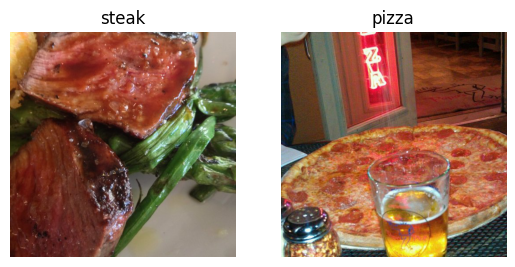

In [ ]:
# Visualize sata
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

## 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

Our next step is to turn our data into **batches**.

A **batch** is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:
* 10,000 images (or more) might not fit into the memory of your processor (GPU).
* Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

A [batch size of 32 is good for your health](https://twitter.com/ylecun/status/989610208497360896?s=20).

No seriously, there are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

To turn our data into batches, we'll first create an instance of [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) for each of our datasets.


In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image from directories and turn then into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           class_mode="binary",
                                           batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images,labels=train_data.next()#get the "next" batch of images/labels
len(images),len(labels)

(32, 32)

In [ ]:
# HOw many batches are there
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
# Get the first two images
images[:2],images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# View the first batch of labels
labels


array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a model (start with a baseline)

You might be wondering what your default model architecture should be.

And the truth is, there's many possible answers to this question.

A simple heuristic for computer vision models is to use the model architecture which is performing best on [ImageNet](https://www.image-net.org/) (a large collection of diverse images to benchmark different computer vision models).

However, to begin with, it's good to build a smaller model to acquire a baseline result which you try to improve upon.

> 🔑 **Note:** In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.

In our case, let's take a smaller version of the model that can be found on the [CNN explainer website](https://poloclub.github.io/cnn-explainer/) (`model_1` from above) and build a 3 layer convolutional neural network.

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
#  Create the model (this will be our base line, a layer convolutional neural network)
model_4=Sequential([
    Conv2D(filters=10,
           kernel_size=1,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),#input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")#output layer (working with binary classification)
])

###3.Compile the model


In [ ]:
# Compile the  model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


###4.Fit the model

In [ ]:
len(train_data),len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4=model_4.fit(train_data,#this is the combination of label and sample data
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 17s 287ms/step - loss: 0.7700 - accuracy: 0.5093 - val_loss: 0.6601 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 11s 240ms/step - loss: 0.6052 - accuracy: 0.6773 - val_loss: 0.4797 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 11s 238ms/step - loss: 0.4585 - accuracy: 0.8033 - val_loss: 0.3468 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 11s 236ms/step - loss: 0.3395 - accuracy: 0.8633 - val_loss: 0.3202 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 11s 223ms/step - loss: 0.2933 - accuracy: 0.8827 - val_loss: 0.3632 - val_accuracy: 0.8400


### 5.Evaluate our model


<Axes: >

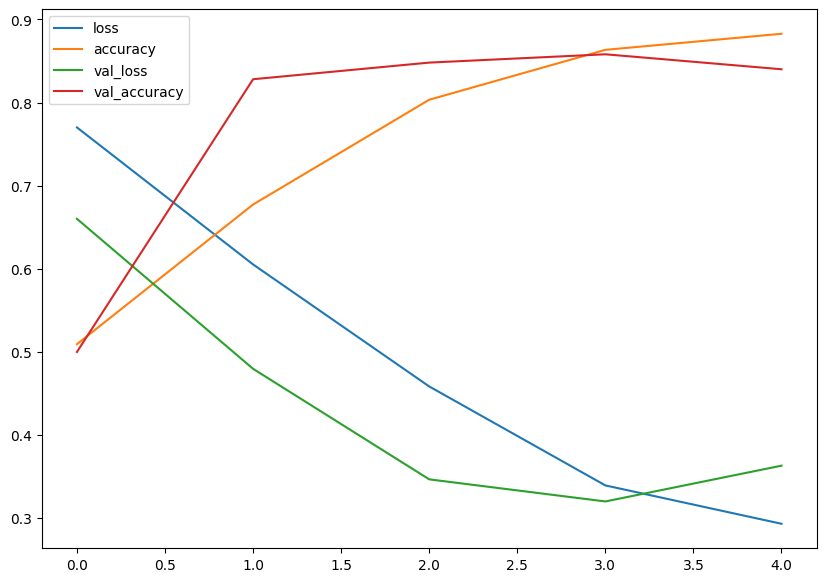

In [ ]:
import  pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
# Plot the validation and the training curve deparately
def plot_loss_curves(history):
  """
  Return separate loss curves for training and validation metrics.
  """

  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs= range(len(history.history["loss"])) #how many epochs did we run for\

  # Plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()





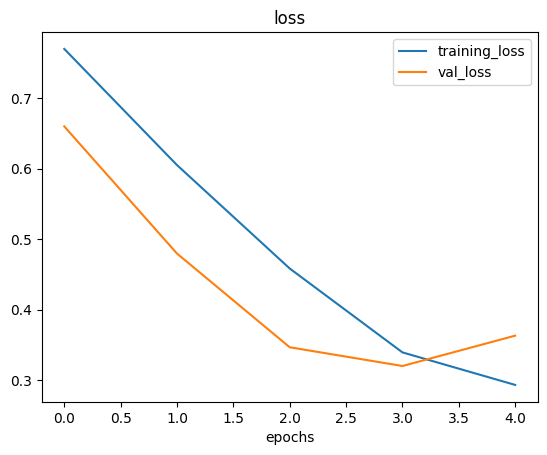

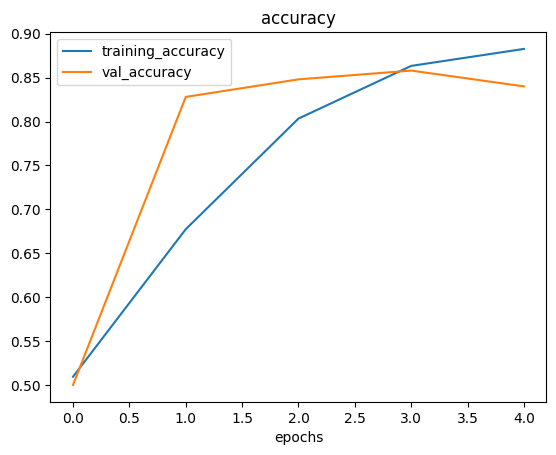

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

Hmm, judging by our loss curves, it looks like our model is **overfitting** the training dataset.

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus its ability to generalize to unseen data will be diminished.

To further inspect our model's training performance, let's separate the accuracy and loss curves.

## 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our falttened layer

Reduce overfitting:
* Add data Augmentation
* Add regularization layers (such as MaxPool2D)
* Add More Data

> **Note:**
Reducing overfitting is also known as **regularization**.


In [ ]:
# Create the model (this is going to be our new baseline)
model_5=Sequential([
    Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),#to fetch the most valuable value out of 4 or more than 4 cells
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="relu")
])

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Compile the model
history_5=model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 222ms/step - loss: 1.0755 - accuracy: 0.4660 - val_loss: 0.7636 - val_accuracy: 0.4660
Epoch 2/5
47/47 [==============================] - 11s 227ms/step - loss: 0.7185 - accuracy: 0.5260 - val_loss: 0.7132 - val_accuracy: 0.5260
Epoch 3/5
47/47 [==============================] - 11s 226ms/step - loss: 0.6375 - accuracy: 0.6240 - val_loss: 0.5844 - val_accuracy: 0.6920
Epoch 4/5
47/47 [==============================] - 11s 224ms/step - loss: 0.5384 - accuracy: 0.7527 - val_loss: 0.5023 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 12s 267ms/step - loss: 0.5172 - accuracy: 0.7860 - val_loss: 0.5377 - val_accuracy: 0.8100


In [ ]:
# Get a summary of the model with max pooling
model_5.summary()
# Conv2d() Layer reduces the pixel of the image by 2 pixels
# MaxPool2D() layer reduce he pixel to half

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 10)      40        
                                                                 
 conv2d_9 (Conv2D)           (None, 222, 222, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 484000)            0         
                                                                 
 dense_9 (Dense)             (None, 1)                 484001    
                                                                 
Total params: 485,861
Trainable params: 485,861
Non-trainable params: 0
_________________________________________________________________


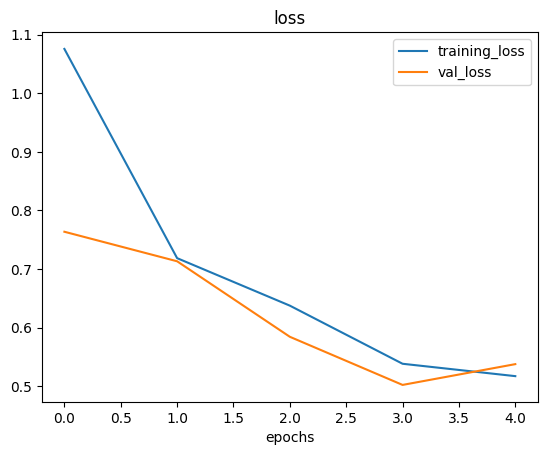

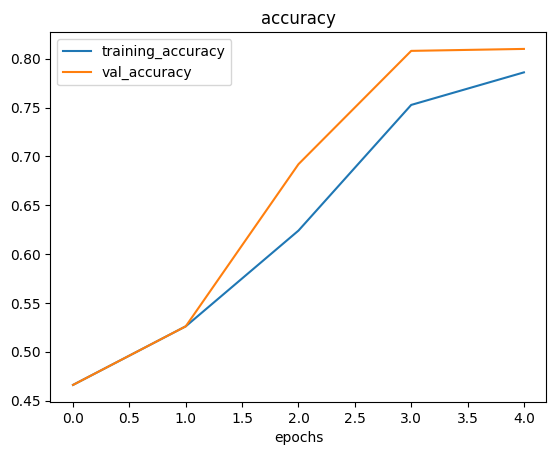

In [ ]:
# Plot loss curve
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation


In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator withour data augmentation
train_datagen= ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen= ImageDataGenerator(rescale=1/255.)

> 🤔 **Question:** What's data augmentation?

**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

> 🔑 **Note:** Data augmentation is usally only performed on the training data. Using the `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [ ]:
# Import data and augmented it from training directory
print("Augmented training data")
train_data_augmented= train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)#for demonstration purpose only

# Create non-augmented train data batches
print("Non-augmented training data")
train_data= train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)
IMG_SIZE=(224,224)
#Create non-augmented test data batches
print("Non-augmented test data:")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=IMG_SIZE,
                                           batch_size=32,
                                           class_mode="binary"
                                           )

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


**Note:**
 Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

 Finally Let's visualize some augmented data!!!

In [ ]:
# Get sample data batches
images, label=train_data.next()

augmented_images, augmented_labels=train_data_augmented.next()#labels aren't augmented only data images


showing image number: 10


(-0.5, 223.5, 223.5, -0.5)

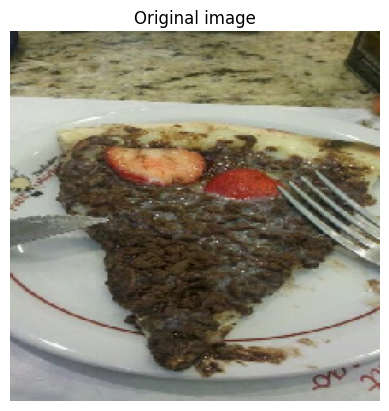

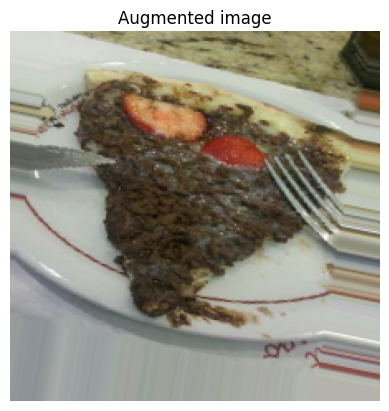

In [ ]:
# Show original image and augmented image
import random
random_number= random.randint(0,31) #our batches size is 32
print(f'showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title(f'Original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data

In [ ]:
# Create the model
model_6=Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6=model_6.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 538ms/step - loss: 0.7147 - accuracy: 0.4500 - val_loss: 0.6886 - val_accuracy: 0.6860
Epoch 2/5
47/47 [==============================] - 26s 545ms/step - loss: 0.6960 - accuracy: 0.5493 - val_loss: 0.6781 - val_accuracy: 0.7280
Epoch 3/5
47/47 [==============================] - 25s 540ms/step - loss: 0.6778 - accuracy: 0.5747 - val_loss: 0.6219 - val_accuracy: 0.7660
Epoch 4/5
47/47 [==============================] - 25s 539ms/step - loss: 0.6379 - accuracy: 0.6553 - val_loss: 0.5432 - val_accuracy: 0.7140
Epoch 5/5
47/47 [==============================] - 25s 544ms/step - loss: 0.5840 - accuracy: 0.6993 - val_loss: 0.4573 - val_accuracy: 0.8340


**Note:**
While training over augmented data processor will take more time becuse
every time augmented data is loaded in the processor

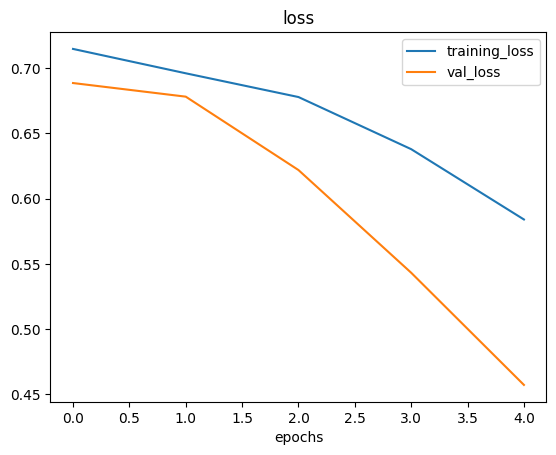

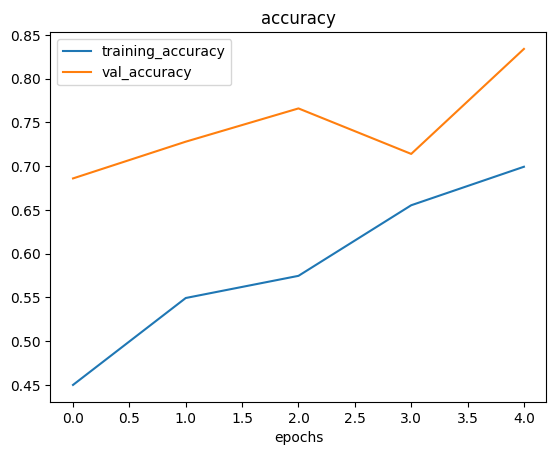

In [ ]:
# Check our models training course
plot_loss_curves(history_6)

##Lets shuffle our augmented training data and train another model(the same as before) on it and see what happens

In [ ]:
# Import data and augment it and shuffle from the training directory
# Import data and augmented it from training directory
print("Augmented training data")
train_data_augmented_shuffled= train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="binary",
    shuffle=True
)#f


Augmented training data
Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"
                ])

# Fit the model
history_7=model_7.fit(train_data_augmented_shuffled,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented_shuffled),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 41s 832ms/step - loss: 0.6345 - accuracy: 0.6173 - val_loss: 0.4914 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 38s 818ms/step - loss: 0.5565 - accuracy: 0.7040 - val_loss: 0.4211 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 34s 724ms/step - loss: 0.4908 - accuracy: 0.7587 - val_loss: 0.4484 - val_accuracy: 0.7660
Epoch 4/5
47/47 [==============================] - 31s 662ms/step - loss: 0.4980 - accuracy: 0.7620 - val_loss: 0.3708 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 27s 579ms/step - loss: 0.4676 - accuracy: 0.7860 - val_loss: 0.3206 - val_accuracy: 0.8760


# Why our data is performing well after data is shuffled
'''
This is happening because in model_6 we are doing sequentially without shuffling the data set so model is learning like first it will learn
over all the pizza dataset then it will adjust itself based on the steak images

But in case of shuffling we are provinding a fair chance to both the image by picking randomly from both the
set of images so everytime our model modify itself which is why model_7 works well
'''

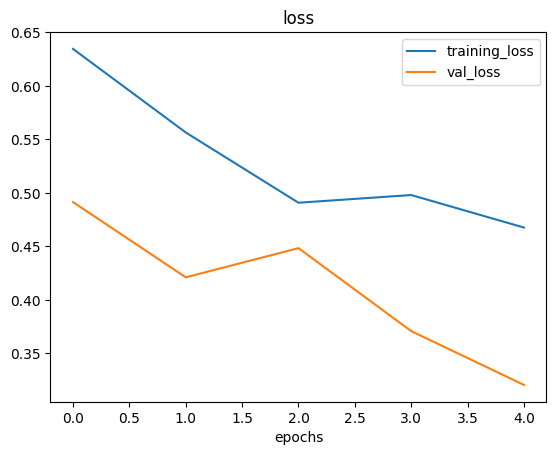

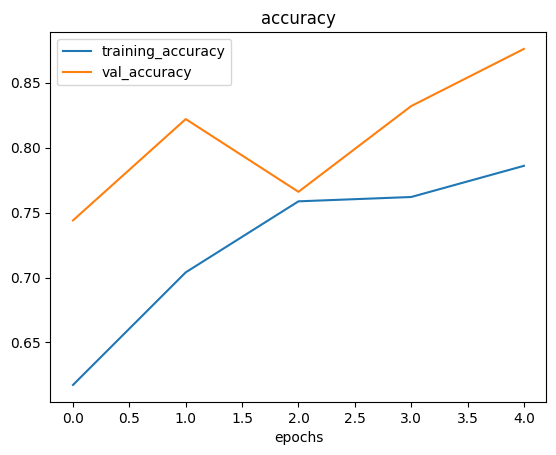

In [ ]:

# Plot loss curves
plot_loss_curves(history_7)

###7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g add more `Conv2D`/ `MaxPool2D` layers)
* Increase the number of filters in each convoultional layer (e.g from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get modre data(give the model more opportuninties to learn)
* Use **Transfer Learning** to leverage what another image with another image model has learn and adjust it for our model

> **Practice:**
>Recreate the model on CNN explainer website (same as `model_1`) and see how it performs over the shuffled data


In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2023-05-04 03:47:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2023-05-04 03:47:14 (89.1 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

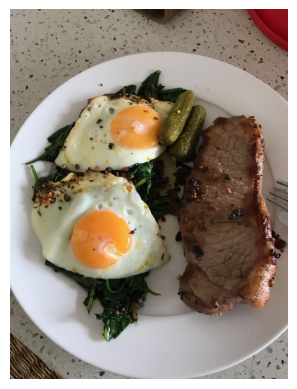

In [ ]:
# View our example
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak=mpimg.imread("03-steak.jpeg")

plt.imshow(steak)
plt.axis(False)

In [ ]:
# Can we pass this image to our model??
# let's try

model_7.predict(steak)

ValueError: ignored

Since our model takes in images of shapes `(224, 224, 3)`, we've got to reshape our custom image to use it with our model.

To do so, we can import and decode our image using [`tf.io.read_file`](https://www.tensorflow.org/api_docs/python/tf/io/read_file) (for readining files) and [`tf.image`](https://www.tensorflow.org/api_docs/python/tf/image) (for resizing our image and turning it into a tensor).

> 🔑 **Note:** For your model to make predictions on unseen data, for example, your own custom images, the custom image has to be in the same shape as your model has been trained on. In more general terms, to make predictions on custom data it has to be in the same form that your model has been trained on.

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
tf.expand_dims(steak,axis=0).shape

TensorShape([1, 4032, 3024, 3])

In [ ]:
expanded_steak=tf.expand_dims(steak,axis=0)

In [ ]:
# Create a function to import and image and resize it to be able to be used with

def load_and_prep_image(filename,img_shape=224):
  '''
  Read an image from filename, turns it into a tensor and reshape it to (img_shape, img_shape, color channel)
  '''
  # Read in the image
  img=tf.io.read_file(filename)
  # Decod  the read file into a tensor
  img=tf.image.decode_image(img)
  # Resize the image
  img=tf.image.resize(img,size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img=img/255.
  return img


In [ ]:
# Load in and preprocess our custom image
steak=load_and_prep_image("03-steak.jpeg")
steak


<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
# model_7.predict(tf.expand_dims(steak,axis=0))
# (1,224,224,3)
# (batch_axis, height, width, channel)
# since our model is working our batch dataset so we have to an extra axis namely batch axis
# That's why we have to increase our dimension
pred=model_7.predict(tf.expand_dims(steak,axis=0))
pred

1/1 [==============================] - 0s 31ms/step


array([[0.85317206]], dtype=float32)

Ahh, the predictions come out in **prediction probability** form. In other words, this means how likely the image is to be one class or another.

Since we're working with a binary classification problem, if the prediction probability is over 0.5, according to the model, the prediction is most likely to be the **postive class** (class 1).

And if the prediction probability is under 0.5, according to the model, the predicted class is most likely to be the **negative class** (class 0).

> 🔑 **Note:** The 0.5 cutoff can be adjusted to your liking. For example, you could set the limit to be 0.8 and over for the positive class and 0.2 for the negative class. However, doing this will almost always change your model's performance metrics so be sure to make sure they change in the right direction.

But saying positive and negative class doesn't make much sense when we're working with pizza 🍕 and steak 🥩...

So let's write a little function to convert predictions into their class names and then plot the target image.

In [ ]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability
pred_class=class_names[int(tf.round(pred))]
pred_class


'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  '''
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title
  '''

  # Import the target image and preprocess it
  img=load_and_prep_image(filename)

  # Make a prediction
  pred=model.predict(tf.expand_dims(img,axis=0))

  # Get the predicted class
  pred_class=class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)#this will show this x and y axis


1/1 [==============================] - 0s 20ms/step


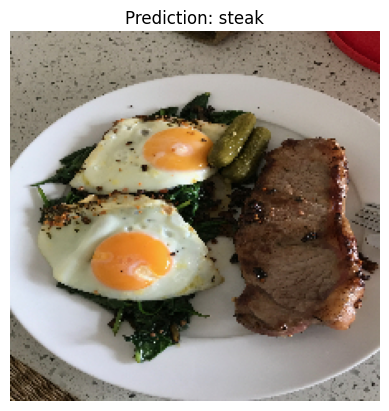

In [ ]:
# Test our model on a custom image
pred_and_plot(model_7,"03-steak.jpeg")

In [ ]:
#Let's try some different image let's take pizza

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
# pizza=mpimg.imread("03-pizza-dad.jpeg")

# plt.imshow(pizza)
# plt.axis(False)

--2023-05-04 04:39:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2023-05-04 04:39:09 (116 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



1/1 [==============================] - 0s 26ms/step


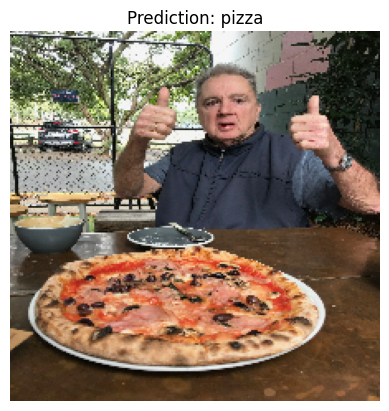

In [ ]:
pred_and_plot(model_7,"03-pizza-dad.jpeg")

# Multi class Image Classification

**Note:**
We've just been through a bunch of the following binary classification problem (pizza vs steak), now we're going to step things up a notch with 10 classes of food (multiclass classification)

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create the model (Start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/ reduce overfitting)
7. Repeat until satisfied

##Import and become one with the data

In [ ]:
# All the images are created and modified by using code , written in github int the extras/imagemodification

import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip


--2023-05-10 02:08:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.119.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  29.6MB/s    in 19s     

2023-05-10 02:09:14 (25.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



AttributeError: ignored

In [ ]:
# unzip our data
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
# Walk through 10 classes of data of food image data
for dirpath,dirname,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirname)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 

In [ ]:
# Set up the train and test directories

train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names
import pathlib
import numpy as np
# going to turn the training directory into python path obect
data_dir= pathlib.Path(train_dir)

class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)



['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder=target_dir+target_class

  # Get a random image path
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")#show the shape of the image
  return img

['2407158.jpg']
Image shape: (512, 512, 3)


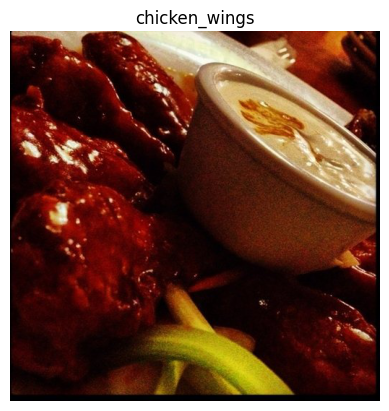

In [ ]:
# Visualize
import random
img=view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

####2. Proprocess our data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We can use the same model (TinyVGG) we used for the binary classification problem for our multi-class classification problem with a couple of small tweaks.

Namely:
* Changing the output layer to use have 10 ouput neurons (the same number as the number of classes we have).
* Changing the output layer to use `'softmax'` activation instead of `'sigmoid'` activation.
* Changing the loss function to be `'categorical_crossentropy'` instead of `'binary_crossentropy'`.